In [7]:
# Dependencies
import requests
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timezone
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
# Import API key
import api_keys
from sodapy import Socrata

In [8]:
traffic_data = pd.read_csv('DataSets/TrafficData.csv')
traffic_data.head()

,day,maximum_fare,minimum_fare,avg_fare,std_dev_fare,rides
0,2013-01-01,910025.0,0.0,1377.74,13320.48,56953
1,2013-01-02,900054.0,0.0,1237.99,8560.35,36830
2,2013-01-03,800130.0,0.0,1233.54,10208.86,38808
3,2013-01-04,600046.0,0.0,1043.77,3515.89,50391
4,2013-01-05,300112.0,0.0,1006.10,1779.21,48354


In [9]:
traffic_data['day']=pd.to_datetime(traffic_data['day'])

In [21]:
weather_data_frame=pd.read_csv('DataSets/2016_weather.csv')
avg_temp_data_frame = weather_data_frame[weather_data_frame['element']=='TAVG']
avg_temp_data_frame['value']= pd.to_numeric( avg_temp_data_frame['value']/10)
avg_temp_data_frame

C:\Users\chami\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,date,element,value,mflag,qflag,sflag,time
8,USW00094846,1/1/2016,TAVG,-4.8,H,NaN,S,NaN
21,USW00094846,1/2/2016,TAVG,-2.8,H,NaN,S,NaN
31,USW00094846,1/3/2016,TAVG,-2.9,H,NaN,S,NaN
40,USW00094846,1/4/2016,TAVG,-2.8,H,NaN,S,NaN
51,USW00094846,1/5/2016,TAVG,-3.6,H,NaN,S,NaN
65,USW00094846,1/6/2016,TAVG,-2.1,H,NaN,S,NaN
72,USW00094846,1/7/2016,TAVG,2.2,H,NaN,S,NaN
79,USW00094846,1/8/2016,TAVG,3.6,H,NaN,S,NaN
98,USW00094846,1/9/2016,TAVG,2.8,H,NaN,S,NaN
114,USW00094846,1/10/2016,TAVG,-7.2,H,NaN,S,NaN


In [22]:
#Convert to DateTimeColumns
avg_temp_data_frame['date']=pd.to_datetime(avg_temp_data_frame['date'])
avg_temp_data_frame.head()

C:\Users\chami\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,date,element,value,mflag,qflag,sflag,time
8,USW00094846,2016-01-01,TAVG,-4.8,H,NaN,S,NaN
21,USW00094846,2016-01-02,TAVG,-2.8,H,NaN,S,NaN
31,USW00094846,2016-01-03,TAVG,-2.9,H,NaN,S,NaN
40,USW00094846,2016-01-04,TAVG,-2.8,H,NaN,S,NaN
51,USW00094846,2016-01-05,TAVG,-3.6,H,NaN,S,NaN


In [23]:
merged_data = pd.merge(traffic_data, avg_temp_data_frame, left_on='day', right_on='date')
merged_data
merged_data.rename(columns={'value': 'avg_temp'}, inplace=True)

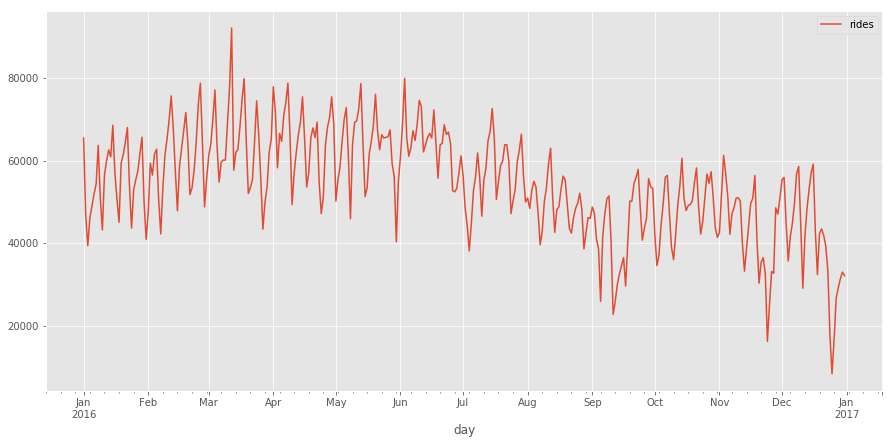

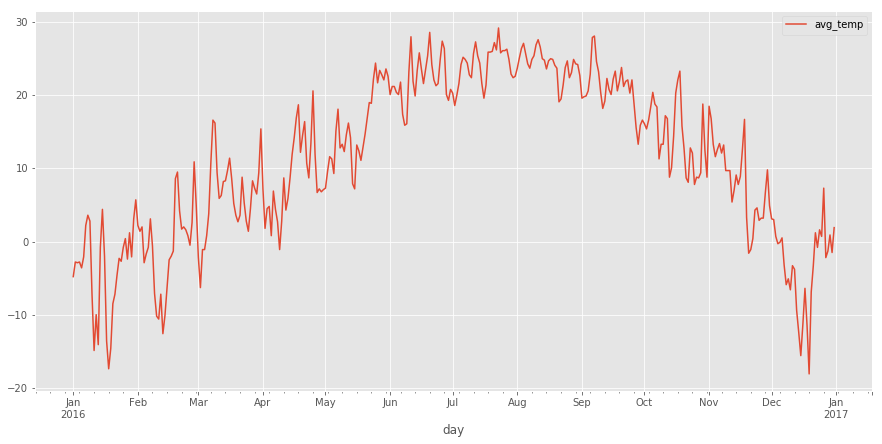

In [24]:
merged_data.plot(x='day',y='rides',figsize=(15,7))
merged_data.plot(x='day',y='avg_temp',figsize=(15,7))

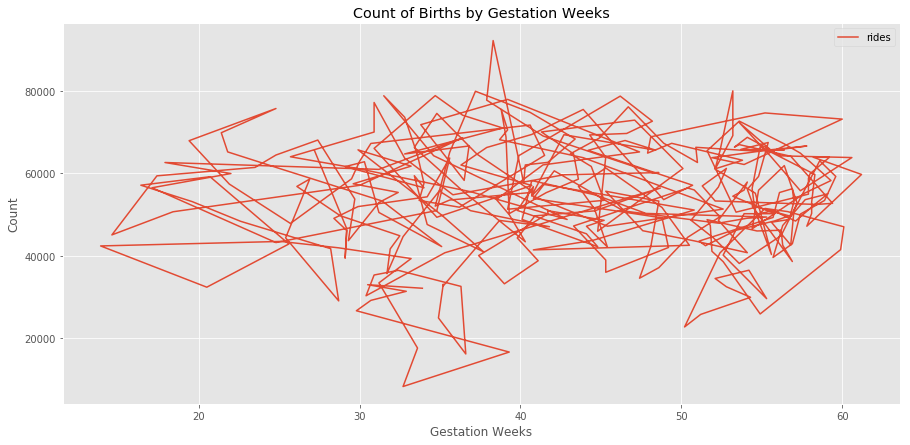

In [16]:
ax = merged_data.plot(kind='line', x='avg_temp', y='rides', figsize=(15,7))
ax.set_title('Count of Births by Gestation Weeks')
ax.set_xlabel('temperature')
ax.set_ylabel('ride count');